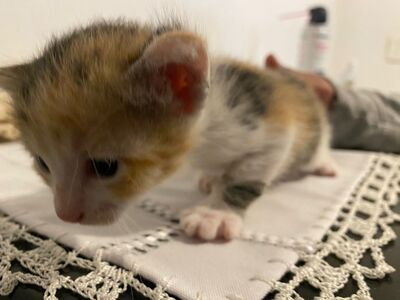

In [1]:
#Se cargan las librearias 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2


original = Image.open('gatitoP.jpg')
ancho = original.size[0]
alto = original.size[1]

original

In [2]:
def cilindricaX( arrayOriginal, m_x, dim):
    copia = arrayOriginal.copy() 
    for i in range(dim[0], dim[1]):
        for j in range(dim[2], dim[3]):
            x = (m_x/np.pi)*(np.arccos(1-(i/(m_x/2))))
            x = int(x)
            arrayOriginal[j][i] = copia[j][x]
    return arrayOriginal

def cilindricaY( arrayOriginal, m_y, dim):
    copia = arrayOriginal.copy()
    for i in range(dim[0], dim[1]):
        for j in range(dim[2], dim[3]):
            y = (m_y/np.pi)*(np.arccos(1-(j/(m_y/2))))
            y = int(y)
            arrayOriginal[j][i][0] = copia[y][i][0]
            arrayOriginal[j][i][1] = copia[y][i][1]
            arrayOriginal[j][i][2] = copia[y][i][2]
    return arrayOriginal

def elipticaX(arrayOriginal, m_x, dim, a):
    copia = arrayOriginal.copy() 
    for i in range(dim[0], dim[1]):
        for j in range(dim[2], dim[3]):
            # Calcular la coordenada x en la imagen original
            x = 1 - i / (m_x/2)
            
            # Calcular el ángulo en la elipse
            f1 = np.arctan(a*np.sqrt(1-x**2)/x) * m_x / np.pi
            f1 = int(f1)
            
            # Copiar el valor de la coordenada correspondiente en la imagen original
            arrayOriginal[j][i][0] = copia[j][f1][0]
            arrayOriginal[j][i][1] = copia[j][f1][1]
            arrayOriginal[j][i][2] = copia[j][f1][2]
    return arrayOriginal

def elipticaY( arrayOriginal, m_y, dim, a):
    copia = arrayOriginal.copy()
    for i in range(dim[0], dim[1]):
        for j in range(dim[2], dim[3]):
            # Calcular la coordenada y en la imagen original
            y = 1 - j / (m_y/2)
            
            # Calcular el ángulo en la elipse
            f2 = np.arctan(a*np.sqrt(1-y**2)/y) * m_y / np.pi
            f2 = int(f2)
            
            # Copiar el valor de la coordenada correspondiente en la imagen original
            arrayOriginal[j][i][0] = copia[f2][i][0]
            arrayOriginal[j][i][1] = copia[f2][i][1]
            arrayOriginal[j][i][2] = copia[f2][i][2]
    return arrayOriginal


(300, 400, 3)


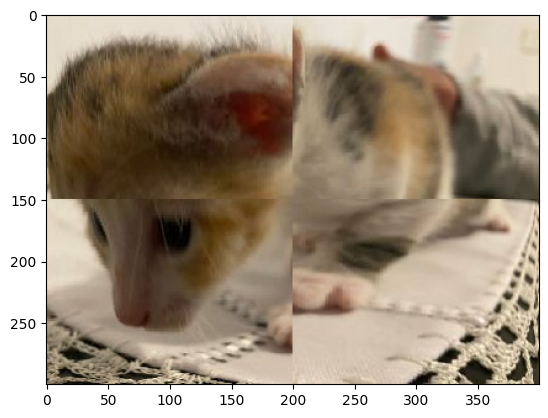

C:\Users\elfer\AppData\Local\Temp\ipykernel_18788\3054398172.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  f1 = np.arctan(a*np.sqrt(1-x**2)/x) * m_x / np.pi


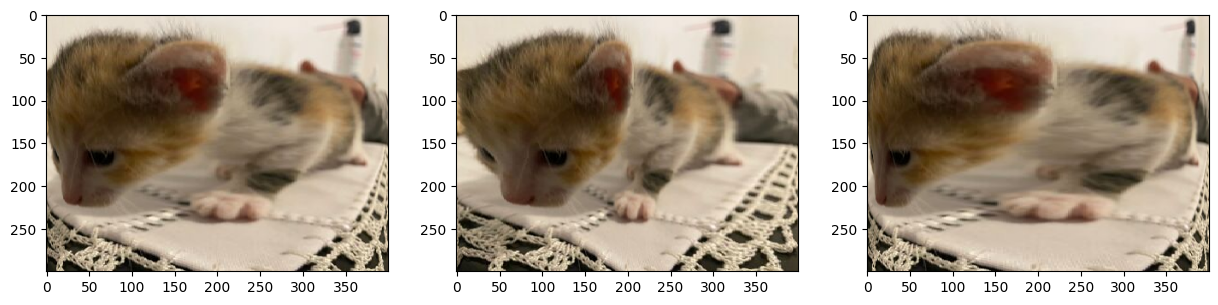

C:\Users\elfer\AppData\Local\Temp\ipykernel_18788\3054398172.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  f2 = np.arctan(a*np.sqrt(1-y**2)/y) * m_y / np.pi


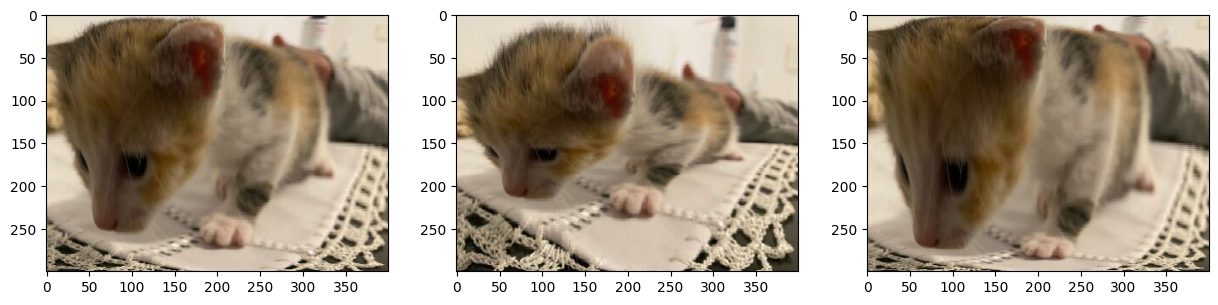

In [3]:
#Transformación cilíndrica en X e Y



#Dividimos la imagen en 4 cuadrantes
dimI = np.array([0, ancho/2, 0, alto/2]).astype(int)
dimII = np.array([ancho/2, ancho, 0, alto/2]).astype(int)
dimIII = np.array([0, ancho/2, alto/2, alto]).astype(int)
dimIV = np.array([ancho/2, ancho, alto/2, alto]).astype(int)
todo = np.array([0, ancho, 0, alto]).astype(int)


#Se hace la transformación cilíndrica en el primer cuadrante, se hace en X para este cuadrante
m_x = ancho
m_y  = alto
arrayOriginal = np.array(original)
print(arrayOriginal.shape)

cuadranteI = cilindricaX(arrayOriginal, m_x, dimI)
cuandranteII = cilindricaY(cuadranteI, m_y, dimII)
cuadranteIII = cilindricaY(cuandranteII, m_y, dimIII)
cuadranteIV = cilindricaX(cuadranteIII, m_x, dimIV)



#Se muestra la imagen 
plt.imshow(Image.fromarray(cuadranteIV))
plt.show()



#Se hace la transformación elíptica en X con a = 1, 0.5 y 1.5
elipticaX1 = elipticaX(np.array(original), m_x, todo, 1)
elipticaX2 = elipticaX(np.array(original), m_x, todo, 0.5)
elipticaX3 = elipticaX(np.array(original), m_x, todo, 1.5)

#Se hace un subplot para mostrar las 3 imágenes
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(Image.fromarray(elipticaX1))
plt.subplot(132)
plt.imshow(Image.fromarray(elipticaX2))
plt.subplot(133)
plt.imshow(Image.fromarray(elipticaX3))
plt.show()

#Se hace la transformación elíptica en Y con a = 1, 0.5 y 1.5
elipticaY1 = elipticaY(np.array(original), m_y, todo, 1)
elipticaY2 = elipticaY(np.array(original), m_y, todo, 0.5)
elipticaY3 = elipticaY(np.array(original), m_y, todo, 1.5)

#Se hace un subplot para mostrar las 3 imágenes
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(Image.fromarray(elipticaY1))
plt.subplot(132)
plt.imshow(Image.fromarray(elipticaY2))
plt.subplot(133)
plt.imshow(Image.fromarray(elipticaY3))
plt.show()
